In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import viz # curriculum example visualizations

np.random.seed(7*7)

### 1. How likely is it that you roll doubles when rolling two dice?

In [51]:
n_simulations = nrows = 10000
n_dice_rolled = ncols = 2

rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = (nrows, ncols))
rolls

array([[5, 3],
       [4, 6],
       [2, 4],
       ...,
       [3, 1],
       [1, 6],
       [3, 2]])

In [52]:
rolls_df = pd.DataFrame(rolls, columns=['roll_1', 'roll_2'])

In [53]:
rolls_df['doubles'] = rolls_df.apply(lambda row: row['roll_1'] == row['roll_2'], axis=1)
rolls_df.head(5)

,roll_1,roll_2,doubles
0,5,3,False
1,4,6,False
2,2,4,False
3,5,1,False
4,2,1,False


In [54]:
# slicing into the multidimensional array, comparing them, and then taking a mean of the resulting
# true/false results
(rolls[:,0] == rolls[:,1]).mean()

0.1694

In [55]:
print('There is about a',round(rolls_df.doubles.mean()*100,2),'percent chance of rolling doubles with two dice.')

There is about a 16.94 percent chance of rolling doubles with two dice.


### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [30]:
n_simulations = nrows = 1000
n_flips       = ncols = 8

flips = np.random.choice([1, 2], size = (nrows, ncols))
flips

array([[2, 2, 1, ..., 1, 2, 1],
       [1, 2, 1, ..., 2, 2, 1],
       [1, 2, 2, ..., 2, 1, 1],
       ...,
       [2, 1, 2, ..., 1, 2, 1],
       [2, 1, 2, ..., 1, 2, 1],
       [2, 2, 1, ..., 2, 1, 2]])

In [43]:
flips_df = pd.DataFrame(flips, columns=['1','2','3','4','5','6','7','8'])
flips_df.head()

,1,2,3,4,5,6,7,8
0,2,2,1,1,2,1,2,1
1,1,2,1,2,2,2,2,1
2,1,2,2,1,1,2,1,1
3,2,2,2,2,2,1,2,1
4,2,1,2,2,1,1,1,1


In [56]:
#flips_df['summed']= flips_df.apply(lambda row: np.count_nonzero(x==1), axis=1)

In [38]:
flip_example = [1,2,1,1,2,1]
num_flips=flip_example.count(1)
num_flips

In [61]:
flips_df.sum(axis = 1)

0      12
1      13
2      11
3      14
4      11
       ..
995    12
996    13
997    12
998    12
999    14
Length: 1000, dtype: int64

In [62]:
(flips_df.sum(axis = 1) ==3).mean()

0.0

### 3. There are approximately 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [72]:
# WD = 0, DS = 1
bb = np.random.choice([0,1], size=(100000, 2), p = [0.75, 0.25])
bb

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [1, 0],
       [0, 0],
       [0, 0]])

In [73]:
p = (bb.sum(axis = 1) ==2).mean()
p

0.06358

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values.

In [75]:
pop = np.random.normal(3,1.5,size = (10000, 5))
pop

array([[ 2.8455428 ,  0.11455904,  1.36898848,  4.28122338,  3.76032539],
       [ 2.13895903,  0.84835603,  0.35482141,  3.74931045,  4.15375703],
       [ 3.67726588,  1.44597986,  4.66662736,  2.95507695,  2.25784421],
       ...,
       [-0.26561806,  1.59735257,  3.8294491 ,  3.54704657,  2.53501097],
       [ 3.17162593,  1.82635816,  3.29815202,  3.0548068 ,  1.90786251],
       [ 3.06722991,  1.84190249,  3.10817151,  1.47671641,  0.02570536]])

Text(0.5, 1.0, 'Distribution of Poptart Packages Purchased Each Day')

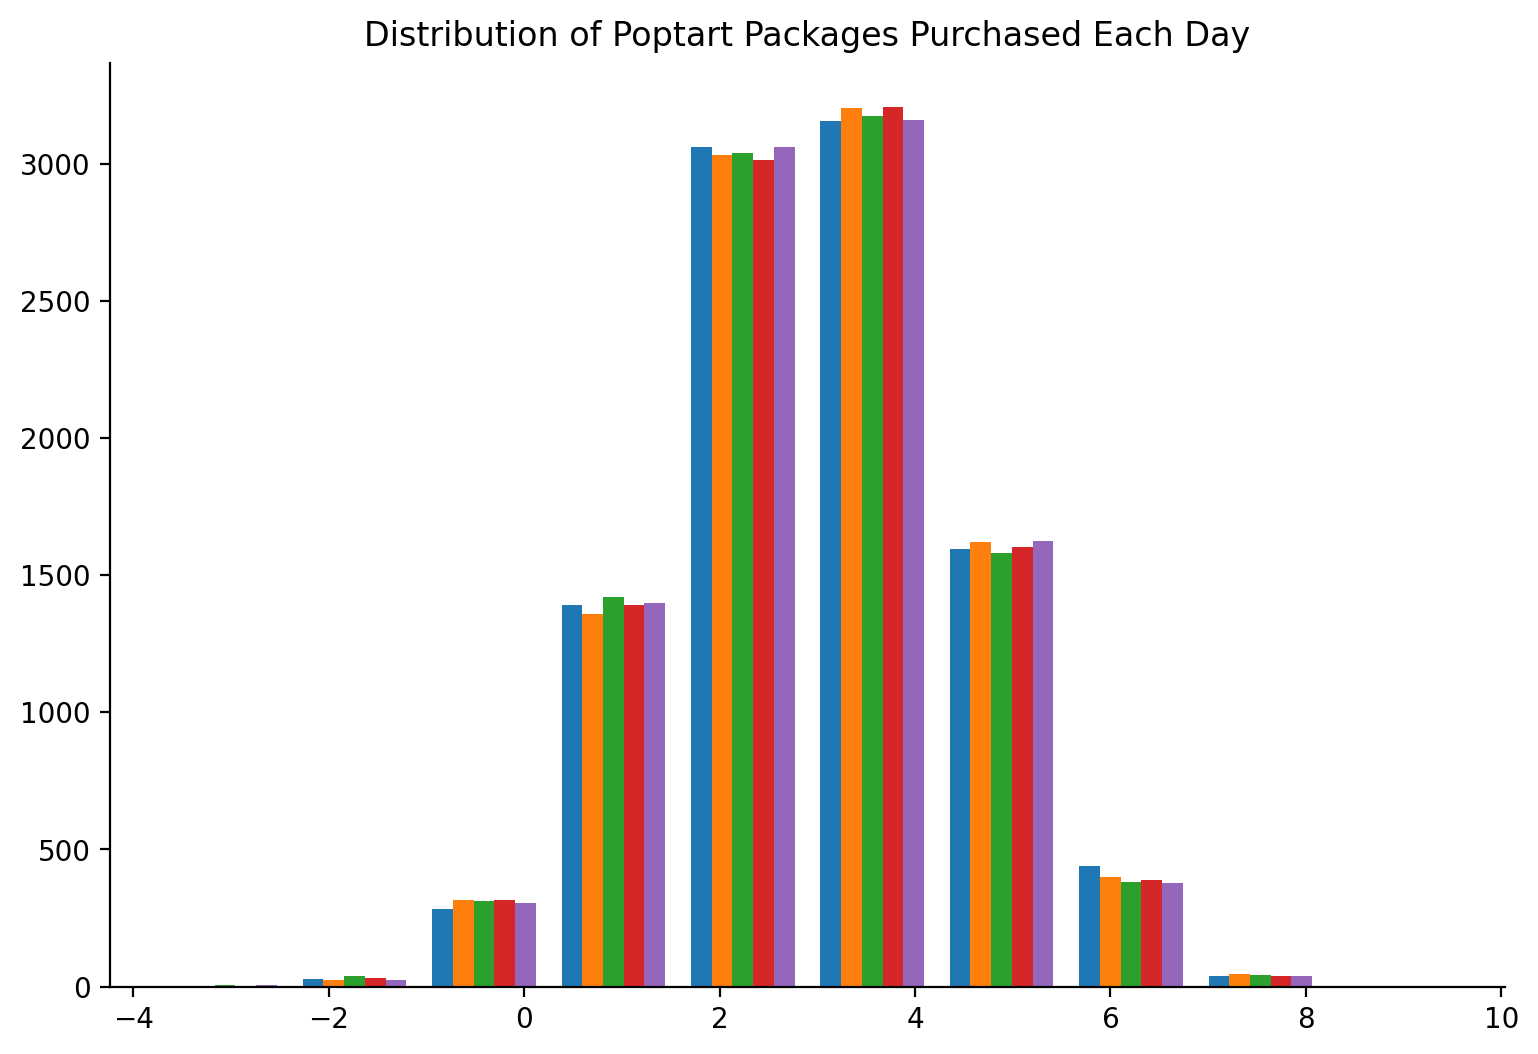

In [78]:
plt.hist(pop);
plt.title('Distribution of Poptart Packages Purchased Each Day')

Text(0.5, 1.0, 'Distribution of Poptart Packages Purchased Each Day')

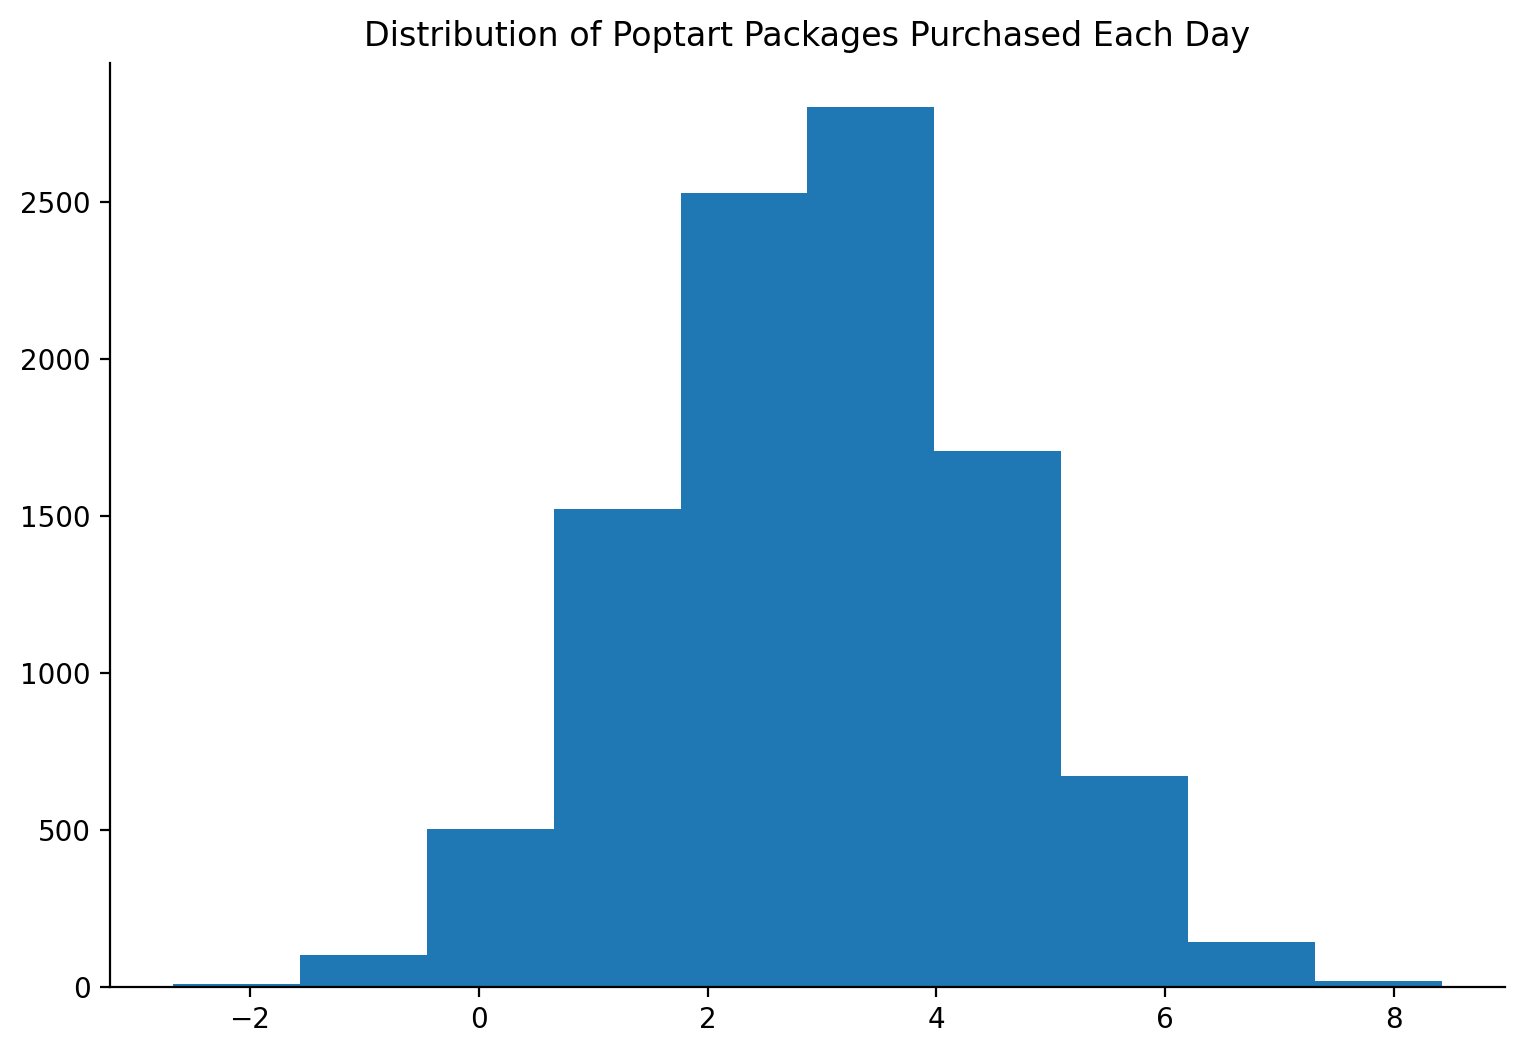

In [81]:
#looks more like a histograph
plt.hist(np.random.normal(3,1.5,size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')

#### If we assume that about 4 poptarts are eaten every day based on the graph above, providing 16 poptarts eaten before friday, leaving 1 poptart to be purchased then:

In [82]:
pop.sum(axis = 1) <= 16

array([ True,  True,  True, ...,  True,  True,  True])

In [84]:
print('There is a',(pop.sum(axis =1) <= 16).mean(),'percent chance of there being a poptart friday to purchase')

There is a 0.6258 percent chance of there being a poptart friday to purchase


### 5. Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- Since you have means and standard deviations, you can use np.random.normal to generate observations.
- If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails.
- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

In [85]:
install = np.random.choice([0,1], size = (10000,50), p = [249/250, 1/250])
install

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
# probabilty of 0 issues for 50 students
print('There is a ',(install.sum(axis = 1) == 0).mean(),' chance there will not be an issue.')

There is a  0.8199  chance there will not be an issue.


In [88]:
install_100 = np.random.choice([0,1], size = (10000,100), p = [249/250, 1/250])

In [89]:
(install_100.sum(axis = 1) == 0).mean()

0.6642

In [90]:
install_150 = np.random.choice([0,1], size = (10000,150), p = [249/250, 1/250])

In [91]:
(install_150.sum(axis = 1) == 0).mean()

0.5375

In [93]:
install_450 = np.random.choice([0,1], size = (10000,450), p = [249/250, 1/250])
fourfifty = (install_450.sum(axis = 1) == 0).mean()

In [94]:
print('There is',fourfifty,'percent chance of the installation going cleanly for every student in a class of 450.')

There is 0.1698 percent chance of the installation going cleanly for every student in a class of 450.


### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park.
- However, you haven't seen a food truck there in 3 days. How unlikely is this?
- How likely is it that a food truck will show up sometime this week?

In [96]:
# 1 = truck, 0 = no truck
trucks = np.random.choice([0,1], size = (10000, 3),p = [0.3,0.7])
trucks

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1]])

In [100]:
# how likely was it that no food trucks showed up three days in a row
(trucks.sum(axis = 1) == 0).mean()

0.0307

In [99]:
trucks1 = np.random.choice([0, 1], size = (10000, 5), p = [0.3, 0.7])
trucks1

array([[1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1],
       ...,
       [1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 0, 1, 0, 1]])

In [111]:
# the likelyhood that a food truck will show up at least one time in a week
print((round(1-(trucks1.sum(axis = 1) == 0).mean(),4))*100,'%')

99.83 %


### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40 people?

In [130]:
bd23 = np.random.choice(range (1,366),size = (10000,23))
bd20 = np.random.choice(range (1,366),size = (10000,20))
bd40 = np.random.choice(range (1,366),size = (10000,40))
bd

array([[352,   6,  64, ...,  61, 236, 190],
       [126, 191, 296, ...,  51, 129, 202],
       [ 24, 175, 104, ..., 363, 315, 165],
       ...,
       [ 20,  33, 137, ...,  24, 214,  68],
       [139, 259, 232, ..., 231, 316,  70],
       [ 50,  77,  62, ..., 221,  47, 133]])

In [125]:
#any time there are fewer than 23 unique numbers, there was at least 1 birthday match
pd.DataFrame(bd23).nunique(axis = 1)

0       21
1       22
2       22
3       23
4       22
        ..
9995    22
9996    22
9997    23
9998    23
9999    23
Length: 10000, dtype: int64

In [126]:
twenty_three_peeps=(pd.DataFrame(bd23).nunique(axis=1)<23).mean()

In [127]:
print('If there are 23 people in a room, there is a',(twenty_three_peeps)*100,'chance for two people to share a birthday.')

If there are 23 people in a room, there is a 50.2 chance for two people to share a birthday.


In [128]:
twenty_peeps=(pd.DataFrame(bd20).nunique(axis=1)<20).mean()

In [133]:
print('If there are 20 people in a room, there is a',round((twenty_peeps)*100,4),'chance for two people to share a birthday.')

If there are 20 people in a room, there is a 41.2 chance for two people to share a birthday.


In [131]:
forty_peeps=(pd.DataFrame(bd40).nunique(axis=1)<40).mean()

In [134]:
print('If there are 40 people in a room, there is a',round((forty_peeps)*100,4),'chance for two people to share a birthday.')

If there are 40 people in a room, there is a 89.04 chance for two people to share a birthday.
